<a href="https://colab.research.google.com/github/vanyakumari15/VOIS_AICTE_Oct2025_VanyaKumari/blob/main/Vanya_Kumari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set default plot style
plt.style.use('seaborn-v0_8')
sns.set_palette('Set2')

In [16]:
from google.colab import drive
drive.mount('/content/drive')

# Example path: change this to your dataset path
# Make sure this path exactly matches the location of your file in Google Drive
file_path = '/content/drive/MyDrive/Netflix Dataset.xlsx'

# Load data
df = pd.read_excel(file_path)

# Show first few rows
print("✅ Dataset Loaded Successfully!")
display(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Dataset Loaded Successfully!


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,0.03,NaN,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19:00,Jorge Michel Grau,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59:00,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [17]:
print("\nDataset Information:")
df.info()

print("\nMissing Values per Column:")
print(df.isnull().sum())

print("\nNumber of Records:", len(df))


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB

Missing Values per Column:
Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

Number of

In [18]:
# Fill missing values with 'Unknown' where applicable
df['Country'].fillna('Unknown', inplace=True)
df['Director'].fillna('Unknown', inplace=True)
df['Cast'].fillna('Unknown', inplace=True)

# Extract Year from 'Release_Date'
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df['year_added'] = df['Release_Date'].dt.year

# Clean duration: separate numeric part and unit (for movies vs shows)
df['Duration'] = df['Duration'].fillna('Unknown')


print("\n✅ Basic Cleaning Done!")


✅ Basic Cleaning Done!


/tmp/ipython-input-3314122737.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Country'].fillna('Unknown', inplace=True)
/tmp/ipython-input-3314122737.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

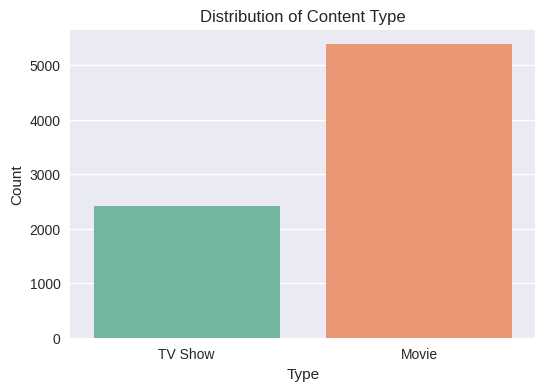

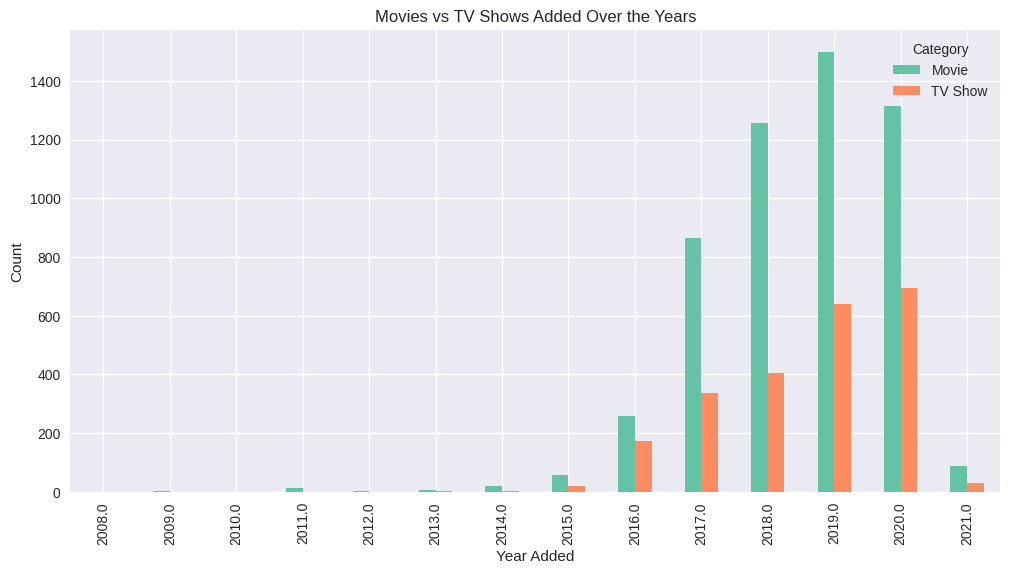

In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Category', hue='Category', legend=False)
plt.title('Distribution of Content Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

# ----- Movies vs TV Shows Over the Years -----
content_trend = df.groupby(['year_added', 'Category']).size().unstack(fill_value=0)
content_trend.plot(kind='bar', stacked=False, figsize=(12,6))
plt.title('Movies vs TV Shows Added Over the Years')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.show()

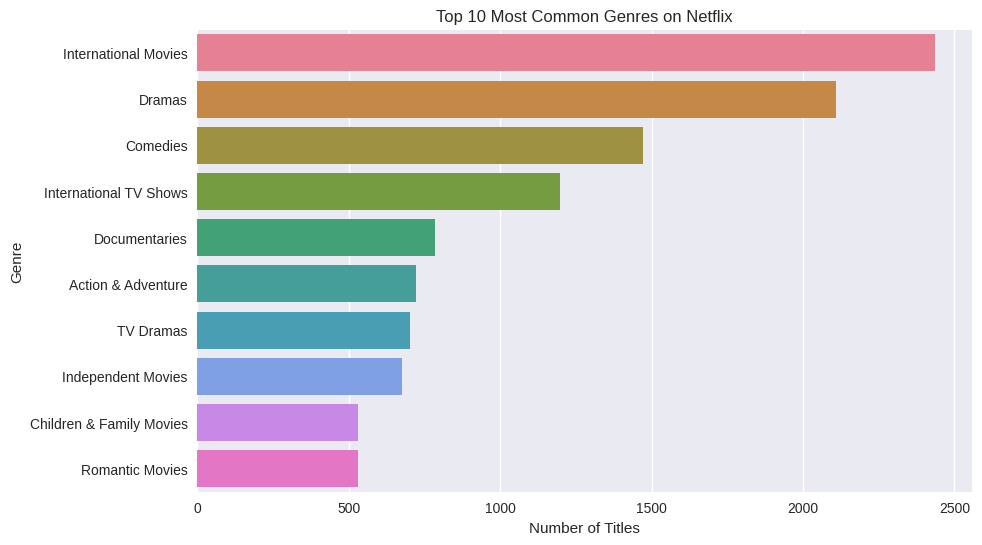

In [20]:
# Split the 'Type' column (genres) into multiple values
df['genres_list'] = df['Type'].str.split(', ')
from collections import Counter

# Flatten list of genres
all_genres = sum(df['genres_list'].dropna(), [])
genre_count = Counter(all_genres)

genre_df = pd.DataFrame(genre_count.items(), columns=['Genre', 'Count'])
genre_df = genre_df.sort_values(by='Count', ascending=False)

# Top 10 genres
plt.figure(figsize=(10,6))
sns.barplot(data=genre_df.head(10), x='Count', y='Genre', hue='Genre', legend=False)
plt.title('Top 10 Most Common Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

/tmp/ipython-input-3096564224.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_df.values, y=country_df.index, palette='viridis')


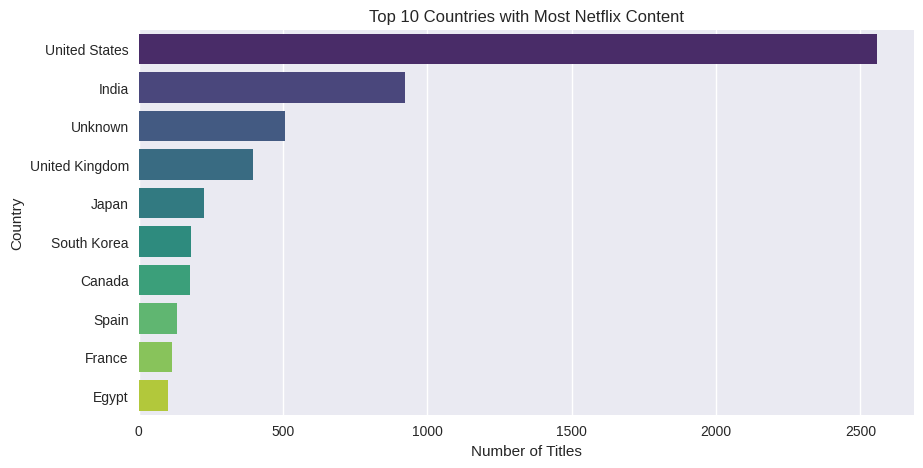

In [21]:
country_df = df['Country'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=country_df.values, y=country_df.index, palette='viridis')
plt.title('Top 10 Countries with Most Netflix Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

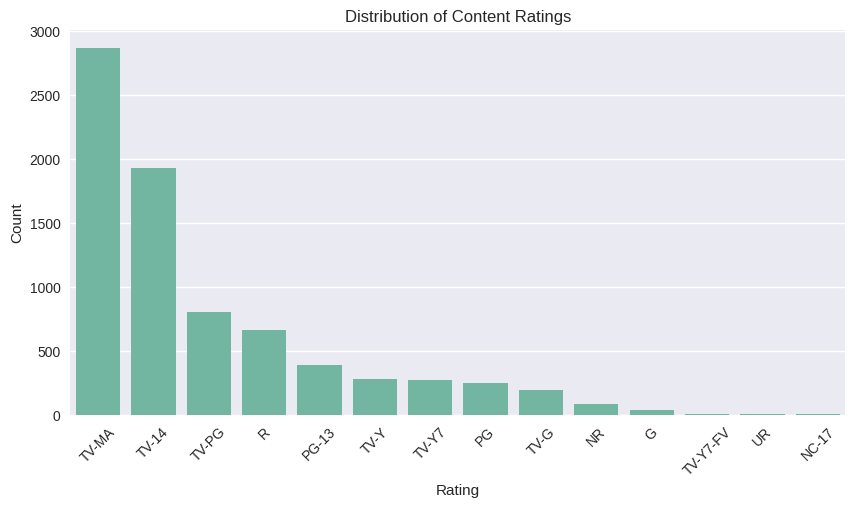

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Rating', order=df['Rating'].value_counts().index)
plt.title('Distribution of Content Ratings')
plt.xticks(rotation=45)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [23]:
print("📈 Summary Insights:")
print("1️⃣ Netflix has more Movies than TV Shows overall.")
print("2️⃣ Content addition peaked between 2017–2020.")
print("3️⃣ Top genres include Dramas, Comedies, and Documentaries.")
print("4️⃣ The USA contributes the highest number of titles, followed by India and the UK.")
print("5️⃣ TV-MA and TV-14 are the most common ratings, indicating mature content is dominant.")

📈 Summary Insights:
1️⃣ Netflix has more Movies than TV Shows overall.
2️⃣ Content addition peaked between 2017–2020.
3️⃣ Top genres include Dramas, Comedies, and Documentaries.
4️⃣ The USA contributes the highest number of titles, followed by India and the UK.
5️⃣ TV-MA and TV-14 are the most common ratings, indicating mature content is dominant.
